In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions


model = VGG16(weights='imagenet', include_top=True) #Load alredy pre-trained model
model.summary() #Print a list of layers with all the details

553467096/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

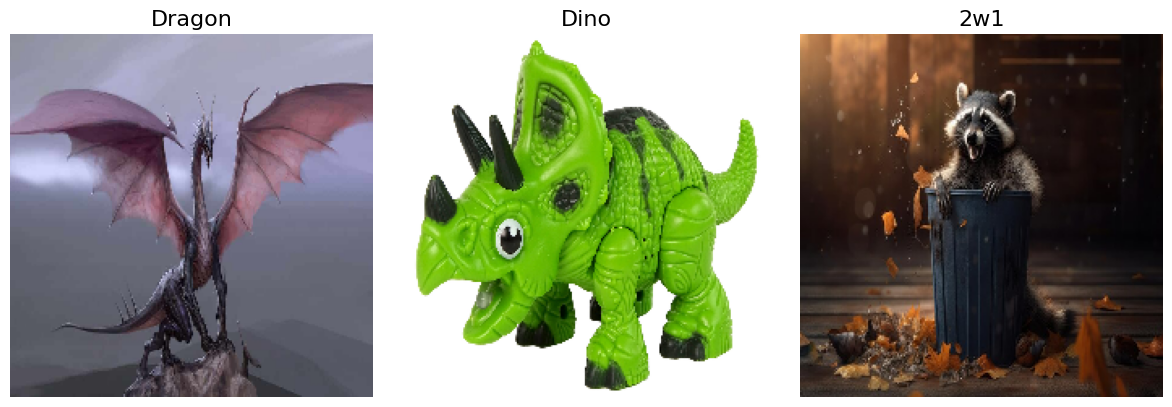

In [3]:
#Further on, each time you will need to complete the code, it will be marked by #TODO

# Assign image titles for your images
image_titles = ['Dragon', 'Dino', '2w1']

# Load images and reshape them
img1 = load_img('/content/drive/MyDrive/Dragon.jpg', target_size=(224, 224))
img2 = load_img('/content/drive/MyDrive/Dino.jpg', target_size=(224, 224))
img3 = load_img('/content/drive/MyDrive/2w1.jpg', target_size=(224, 224))
#We resize the images into size 224 x 224, as the model prefers those sizes. However, if your images are smaller, you can change those values a little bit.

# Convert them to a Numpy array
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

# Preparing input data for VGG16
X = preprocess_input(images)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Predict the output (probabilities) of the layer, corresponding to an image
preds = model.predict(images)
best_class = np.argmax(preds, axis = 1) #TODO find the best class (use argmax or argsort function)

print('Predicted:', decode_predictions(preds, top=3)[0])
print('Predicted:', decode_predictions(preds, top=3)[1])
print('Predicted:', decode_predictions(preds, top=3)[2]) #Decode prediction based on Imagenet dataset dictionary. Each umerical class is assigned to a real-life label
print(best_class)

1/1 [==============================] - 2s 2s/step
Predicted: [('n04507155', 'umbrella', 0.5363956), ('n03958227', 'plastic_bag', 0.18921475), ('n02869837', 'bonnet', 0.1600347)]
Predicted: [('n01704323', 'triceratops', 0.9999497), ('n03935335', 'piggy_bank', 3.5182835e-05), ('n03476684', 'hair_slide', 9.4155275e-06)]
Predicted: [('n03388043', 'fountain', 0.5042612), ('n04209239', 'shower_curtain', 0.09049186), ('n09229709', 'bubble', 0.034411754)]
[879  51 562]


In [11]:
pip install tf_keras_vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.3 MB/s eta 0:00:00


In [12]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

In [13]:
def visualise_heatmap(map):
  f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
  for i, title in enumerate(image_titles):
      heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
      ax[i].set_title(title, fontsize=16)
      ax[i].imshow(images[i])
      ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
      ax[i].axis('off')
  plt.tight_layout()
  plt.show()

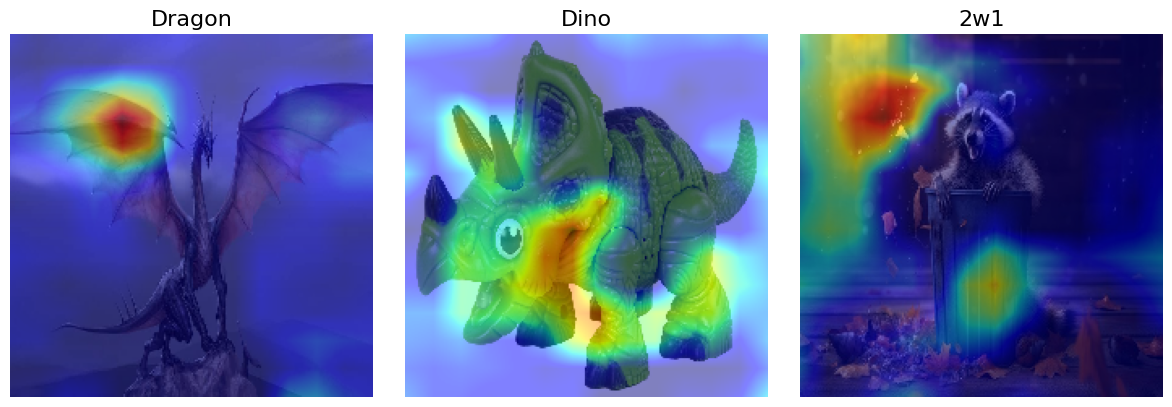

In [14]:
replace2linear = ReplaceToLinear()
score = CategoricalScore(list(best_class))

gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

cam = gradcam(score,
              X,
              penultimate_layer=-1)

visualise_heatmap(cam)

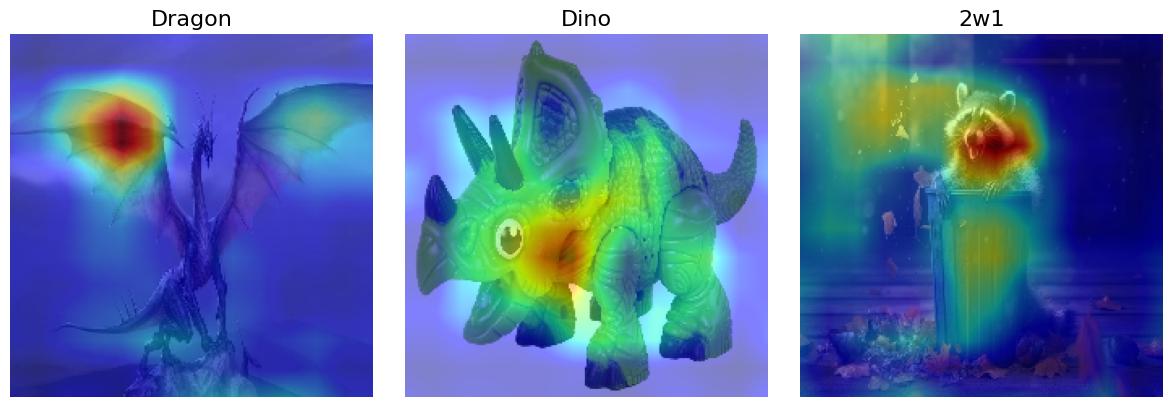

In [15]:
gradcam = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)

cam = gradcam(score,
              X,
              penultimate_layer=-1)

visualise_heatmap(cam)

48/48 [==============================] - 846s 18s/step


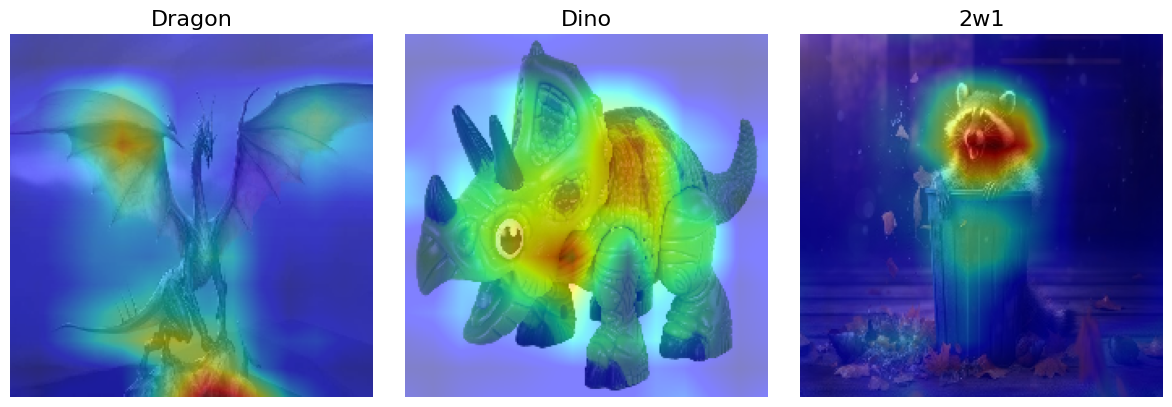

In [16]:
scorecam = Scorecam(model)
cam = scorecam(score, X, penultimate_layer=-1)
visualise_heatmap(cam)

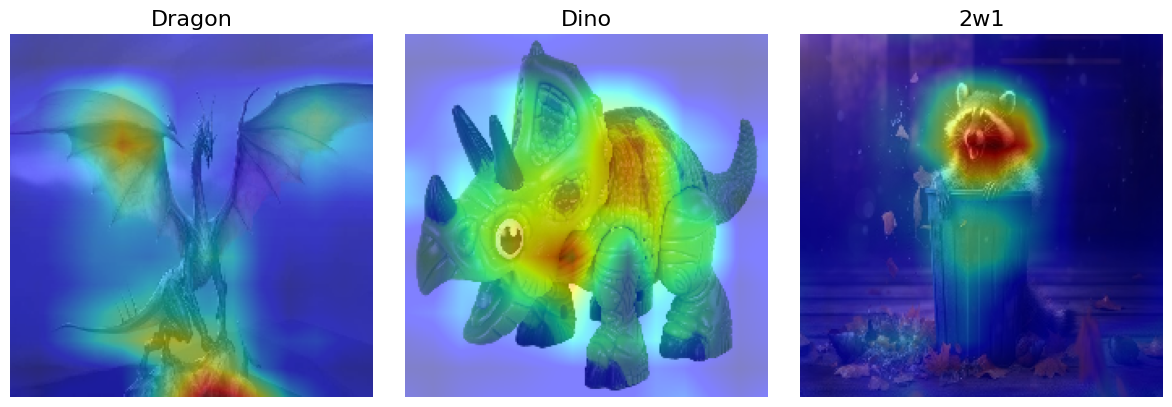

In [17]:
saliency = Saliency(model, model_modifier=replace2linear, clone=True)
saliency_map = saliency(score, X)
visualise_heatmap(saliency_map)

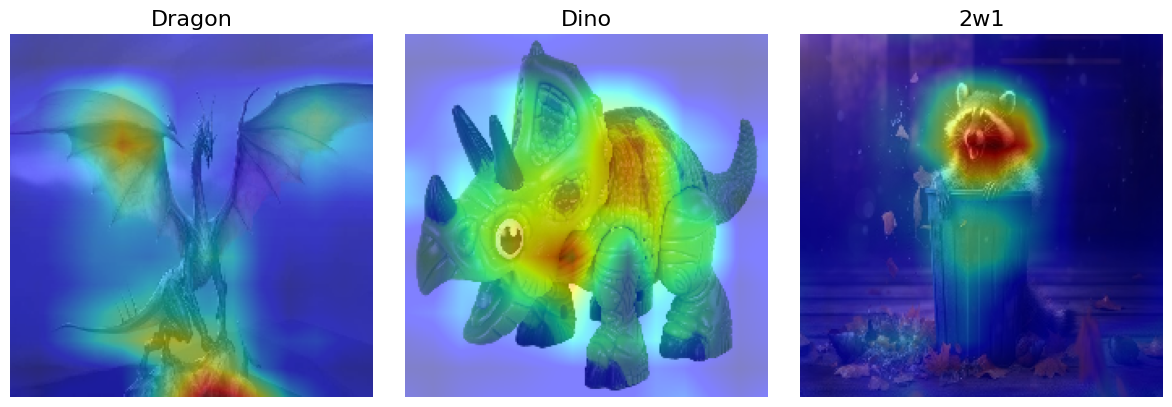

In [18]:
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.20)
visualise_heatmap(saliency_map)

1/1 [==============================] - 1s 648ms/step


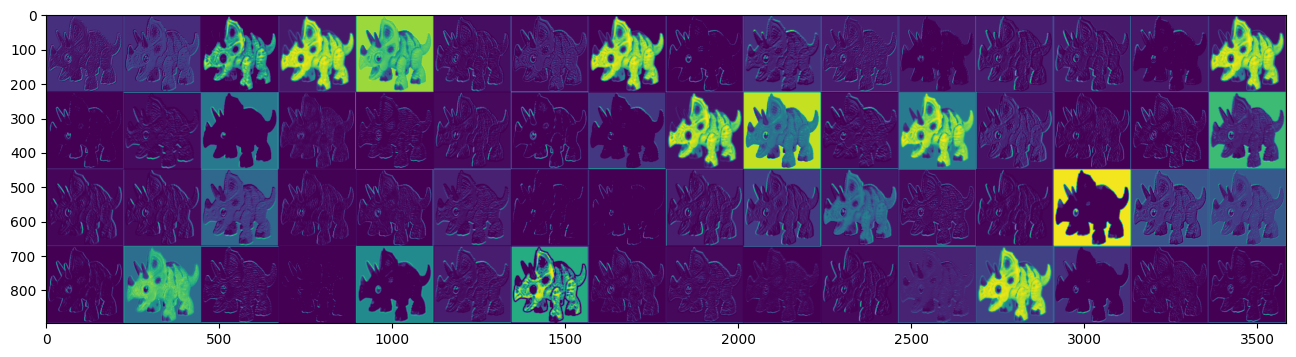

In [23]:
layer_outputs = [layer.output for layer in model.layers] #Loop through the model defined in the beginning to access outputs of individual layers
activation_model = models.Model(model.input, layer_outputs)
X_reshaped = np.reshape(img2, newshape=(1,224,224,3))#TODO take one image and reshape it into size (1,224,224,3)
activations = activation_model.predict(X_reshaped) #TODO use the predict function on the activation model to get the intermediate activations

layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name == 'block1_conv2': #TODO Specify the name of the layer that you want to see. Choose one name from the model summary we printed in the beginning
        number_of_feature_maps = layer_activation.shape[-1]
        feature_map_shape = layer_activation.shape[1]
        n_cols = number_of_feature_maps // images_per_row
        display_grid = np.zeros((feature_map_shape * n_cols, images_per_row * feature_map_shape))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image /= np.max(channel_image)
                display_grid[col * feature_map_shape : (col + 1) * feature_map_shape, row * feature_map_shape : (row + 1) * feature_map_shape] = channel_image
        scale = 1. / feature_map_shape
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [24]:
layer_outputs = [layer.output for layer in model.layers] #Loop through the model defined in the beginning to access outputs of individual layers
activation_model = models.Model(model.input, layer_outputs)
X_reshaped = np.reshape(img2, newshape=(1,224,224,3))#TODO take one image and reshape it into size (1,224,224,3)
activations = activation_model.predict(X_reshaped) #TODO use the predict function on the activation model to get the intermediate activations

layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name == 'block3_conv2': #TODO Specify the name of the layer that you want to see. Choose one name from the model summary we printed in the beginning
        number_of_feature_maps = layer_activation.shape[-1]
        feature_map_shape = layer_activation.shape[1]
        n_cols = number_of_feature_maps // images_per_row
        display_grid = np.zeros((feature_map_shape * n_cols, images_per_row * feature_map_shape))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image /= np.max(channel_image)
                display_grid[col * feature_map_shape : (col + 1) * feature_map_shape, row * feature_map_shape : (row + 1) * feature_map_shape] = channel_image
        scale = 1. / feature_map_shape
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.imshow(display_grid, aspect='auto', cmap='viridis')


Output hidden; open in https://colab.research.google.com to view.